In [12]:
import pandas as pd
df = pd.read_csv("../data/processed/health_checkup_processed.csv")

In [13]:
df.shape, df.columns

((662623, 29),
 Index(['성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '시력(좌)',
        '시력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
        'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)',
        '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부', 'bmi', 'alt_ast_ratio',
        'tg_hdl_ratio', 'ggtp_alt_ratio', 'ldl_hdl_ratio', 'pulse_pressure',
        'hypertension_status'],
       dtype='object'))

In [25]:
df.describe()

,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),...,감마지티피,흡연상태,음주여부,bmi,alt_ast_ratio,tg_hdl_ratio,ggtp_alt_ratio,ldl_hdl_ratio,pulse_pressure,hypertension_status
count,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.00000,...,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000
mean,1.454465,11.341686,162.374955,64.440919,82.251432,0.937076,0.936682,124.488241,76.111680,101.69042,...,35.337201,1.557792,0.616764,24.293999,0.961357,2.403021,1.416130,2.139834,48.376561,0.162220
std,0.497923,2.838014,9.661329,13.528826,10.100082,0.607910,0.606560,14.603383,10.153111,21.47955,...,40.654700,0.790164,0.486175,3.784789,0.380749,1.740195,1.307039,0.877969,10.673794,0.368653
min,1.000000,5.000000,130.000000,30.000000,7.600000,0.100000,0.100000,80.000000,40.000000,50.00000,...,1.000000,1.000000,0.000000,9.795918,0.010753,0.170940,0.010000,0.082645,5.000000,0.000000
25%,1.000000,9.000000,155.000000,55.000000,75.000000,0.700000,0.700000,115.000000,70.000000,90.00000,...,16.000000,1.000000,0.000000,21.484375,0.708333,1.190476,0.789474,1.492537,40.000000,0.000000
50%,1.000000,11.000000,160.000000,65.000000,82.000000,0.900000,0.900000,123.000000,76.000000,97.00000,...,23.000000,1.000000,1.000000,23.875115,0.888889,1.891304,1.100000,2.018519,48.000000,0.000000
75%,2.000000,13.000000,170.000000,75.000000,89.000000,1.200000,1.200000,134.000000,82.000000,107.00000,...,38.000000,2.000000,1.000000,26.234568,1.136364,3.065574,1.600000,2.660377,54.000000,0.000000
max,2.000000,18.000000,195.000000,135.000000,167.700000,9.900000,9.900000,242.000000,150.000000,300.00000,...,700.000000,3.000000,1.000000,56.191467,35.000000,36.272727,148.333333,13.166667,149.000000,1.000000


In [14]:
df['hypertension_status'].value_counts()

hypertension_status
0    555132
1    107491
Name: count, dtype: int64

| 값   | 의미    | 샘플 수    | 비율          |
| --- | ----- | ------- | ----------- |
| `0` | 정상 혈압 | 555,132 | 약 **83.8%** |
| `1` | 고혈압   | 107,491 | 약 **16.2%** |

| 관점         | 전략                                                                       |
| ---------- | ------------------------------------------------------------------------ |
| 분류 모델 선택 시 | `accuracy`만 보면 안 됨 → 고혈압(1)을 무시해도 정확도 높게 나옴                           |
| 평가 지표      | `precision`, `recall`, `F1-score`, **AUC-ROC** 등을 반드시 봐야 함               |
| 학습 데이터     | 언더샘플링/오버샘플링 고려 →  **SMOTE**, ADASYN, 또는 **XGBoost 내 class\_weight 조정** |

타겟 분포 확인 결과, 전체 데이터 중 약 16.2%가 고혈압 환자로 분류되며,  
이는 분류 모델 학습 시 클래스 불균형 문제를 고려해야 함을 시사 
정확도 외에도 정밀도(Precision), 재현율(Recall), AUC 등 다양한 평가지표와  
샘플링 전략 또는 가중치 보정이 함께 사용 필요

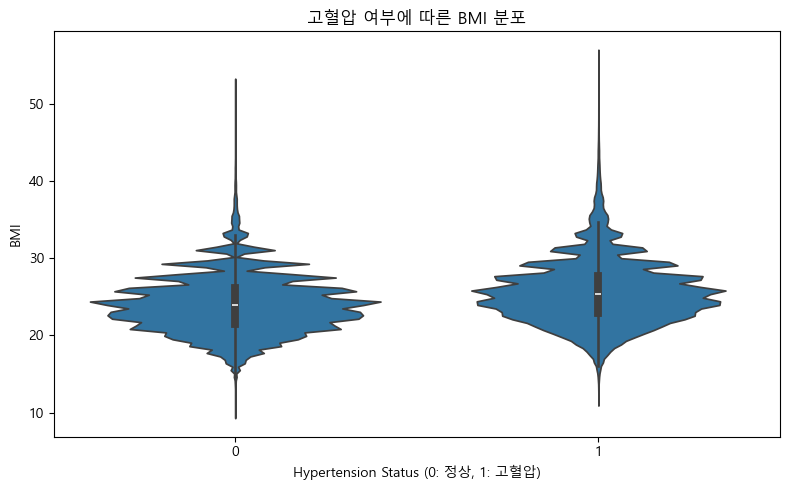

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows의 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우: 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 기호 깨짐 방지

plt.figure(figsize=(8, 5))
sns.violinplot(x='hypertension_status', y='bmi', data=df, inner='box')
plt.title("고혈압 여부에 따른 BMI 분포")
plt.xlabel("Hypertension Status (0: 정상, 1: 고혈압)")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

Violinplot을 통해 BMI 분포를 시각화한 결과,  
고혈압자는 정상자에 비해 BMI의 전체 분포가 우측으로 이동해 있으며,  
과체중~비만(BMI 27~30) 구간에 밀도 집중이 뚜렷하게 나타난다.  
이는 BMI가 고혈압 발생과 밀접한 관련이 있음을 시사하며,  
고도비만(BMI > 35)에서의 꼬리 확장은 고위험군 특성으로 해석

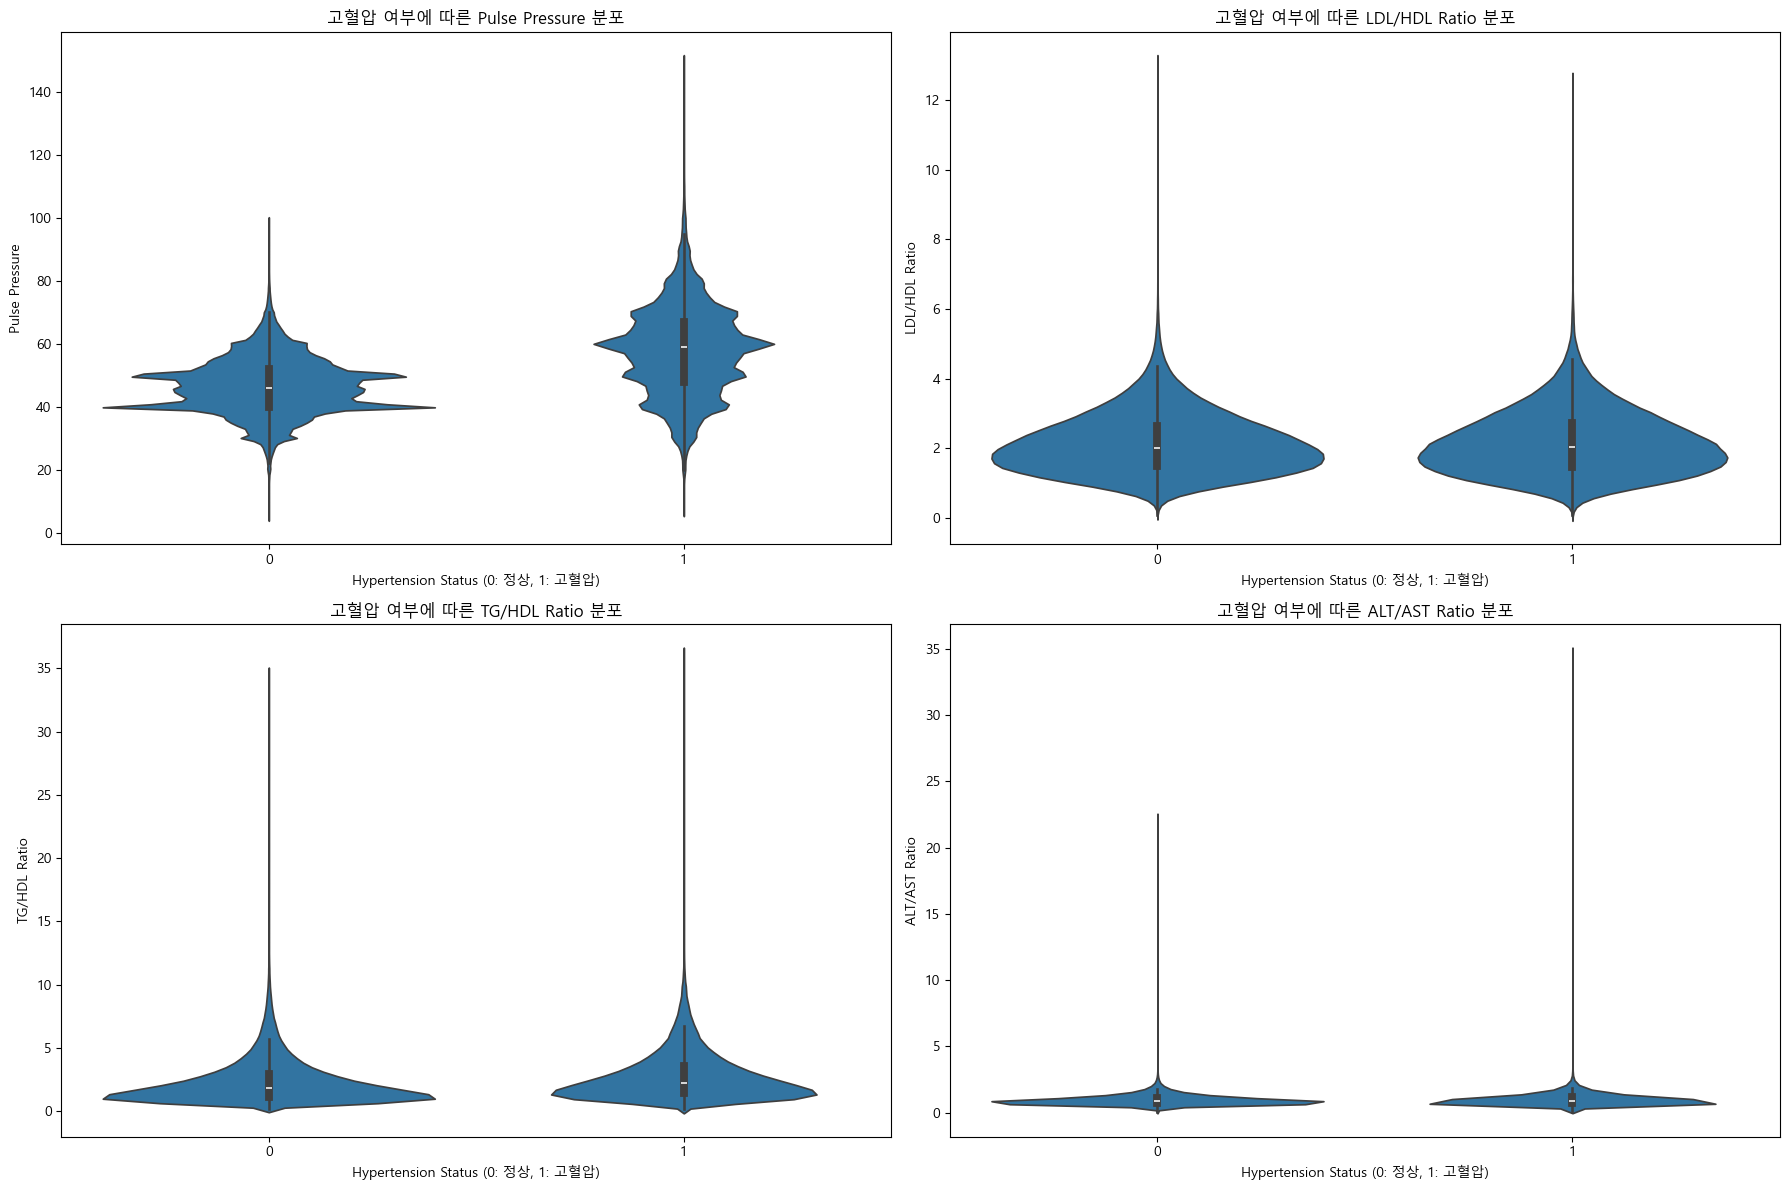

In [6]:
# 시각화할 변수 리스트
plot_features = ['pulse_pressure', 'ldl_hdl_ratio', 'tg_hdl_ratio', 'alt_ast_ratio']
titles = ['Pulse Pressure', 'LDL/HDL Ratio', 'TG/HDL Ratio', 'ALT/AST Ratio']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(plot_features):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='hypertension_status', y=feature, data=df, inner='box')
    plt.title(f"고혈압 여부에 따른 {titles[i]} 분포")
    plt.xlabel("Hypertension Status (0: 정상, 1: 고혈압)")
    plt.ylabel(titles[i])

plt.tight_layout()
plt.show()

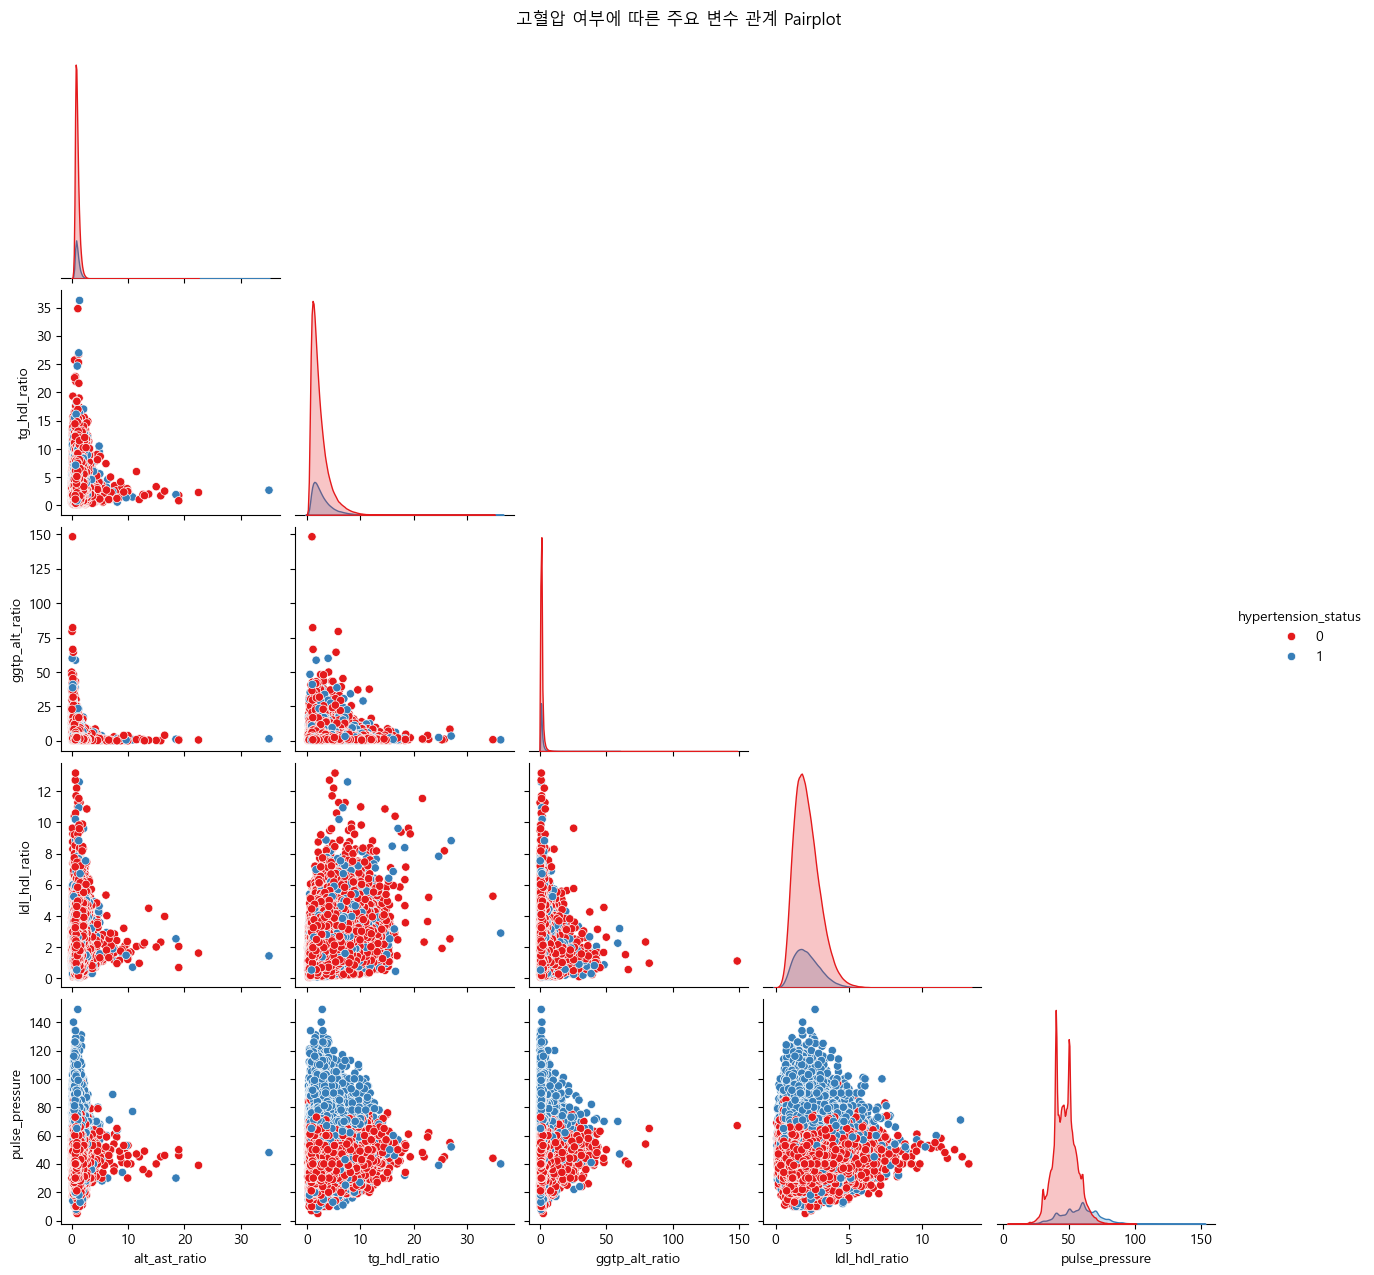

In [16]:
# 주요 피처 리스트 (선택형: 분석 핵심 변수 중심)
pair_features = [
    'alt_ast_ratio',
    'tg_hdl_ratio',
    'ggtp_alt_ratio',
    'ldl_hdl_ratio',
    'pulse_pressure',
    'hypertension_status'
]

# 시각화
sns.pairplot(df[pair_features], hue='hypertension_status', palette='Set1', corner=True)
plt.suptitle("고혈압 여부에 따른 주요 변수 관계 Pairplot", y=1.02)
plt.show()

EDA 시각화 결과, BMI, pulse_pressure, TG/HDL 비율, 식전혈당, 연령대 등이  
고혈압 여부에 따라 분포 차이가 뚜렷하게 나타나는 변수로 확인되었으며,  
이는 해당 피처들이 예측 모델에서 주요 설명변수로 활용될 수 있음을 시사

반면 청력, 요단백, 성별코드 등은 고혈압 분포와의 차이가 미미하여  
모델에서 제거하거나 보조 변수로 활용하는 것이 타당한 것으로 판단
또한 일부 변수들 간에는 높은 상관성이 존재하여,  
다중공선성 해소를 위한 변수 선택이 필요함을 확인

In [10]:
features = [
    '성별코드',
    '연령대코드(5세단위)',
    '허리둘레',
    '시력(좌)',
    '시력(우)',
    '식전혈당(공복혈당)',
    '총콜레스테롤',
    '트리글리세라이드',
    'HDL콜레스테롤',
    'LDL콜레스테롤',
    '혈색소',
    '요단백',
    '혈청크레아티닌', 
    '혈청지오티(AST)',
    '혈청지피티(ALT)',
    '감마지티피',
    'bmi',
    'alt_ast_ratio',
    'tg_hdl_ratio',
    'ggtp_alt_ratio',
    'ldl_hdl_ratio',
    'pulse_pressure',
    'hypertension_status'
]

In [26]:
def plot_ratio_feature_analysis(df, col, target='hypertension_status', bins=None):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1. Histogram
    sns.histplot(df[col], bins=40, ax=axes[0], color='skyblue', kde=False)
    axes[0].set_title(f"{col} Histogram")

    # 2. KDE Plot (타겟별 밀도)
    sns.kdeplot(data=df[df[target]==0], x=col, label='정상', ax=axes[1], fill=True)
    sns.kdeplot(data=df[df[target]==1], x=col, label='고혈압', ax=axes[1], fill=True)
    axes[1].set_title(f"{col} 분포 밀도곡선")
    axes[1].legend()

    # 3. Bin → Barplot (고혈압 비율)
    bin_label = f"{col}_bin"
    df[bin_label] = pd.cut(df[col], bins=bins)
    bin_group = df.groupby(bin_label)[target].mean()
    bin_group.plot(kind='bar', ax=axes[2], title=f"{col} 구간별 고혈압 비율")
    axes[2].set_ylabel("고혈압 비율")

    plt.tight_layout()
    plt.show()

In [28]:
ratio_features = [
     'alt_ast_ratio',
    'tg_hdl_ratio',
    'ggtp_alt_ratio',
    'ldl_hdl_ratio'
]

In [27]:
bin_dict = {
    'alt_ast_ratio': [0, 0.7, 0.9, 1.1, 1.5, 3, 10],
    'tg_hdl_ratio':  [0, 1, 2, 3, 4, 5, 10],
    'ggtp_alt_ratio': [0, 0.8, 1.2, 2, 5, 10, 150],
    'ldl_hdl_ratio': [0, 1, 1.5, 2, 2.5, 3, 5, 10]
}

C:\Users\asia\AppData\Local\Temp\ipykernel_8180\1237547272.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_group = df.groupby(bin_label)[target].mean()


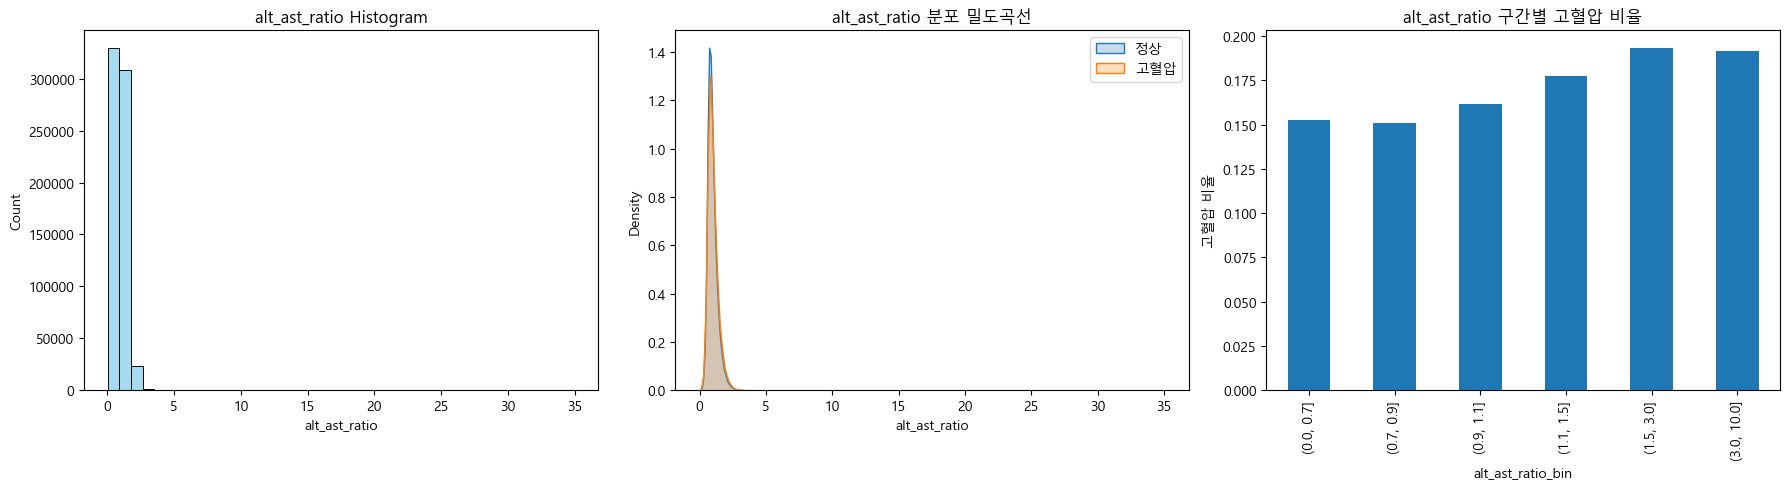

C:\Users\asia\AppData\Local\Temp\ipykernel_8180\1237547272.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_group = df.groupby(bin_label)[target].mean()


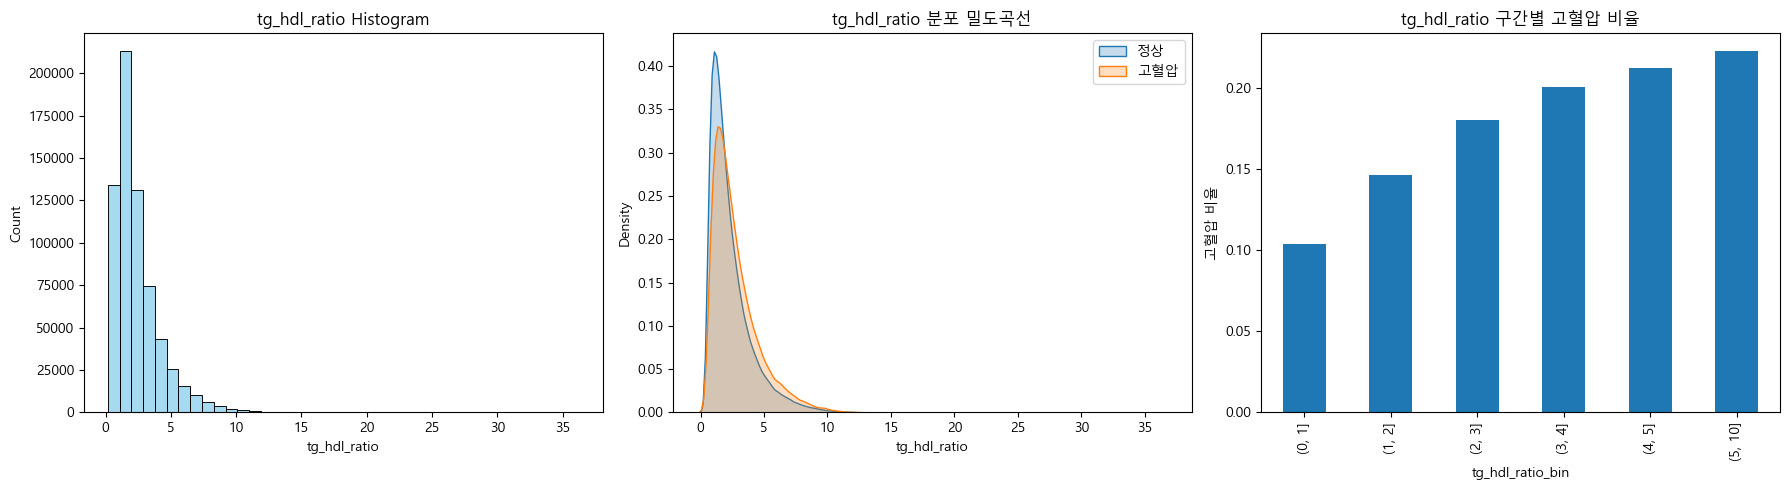

C:\Users\asia\AppData\Local\Temp\ipykernel_8180\1237547272.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_group = df.groupby(bin_label)[target].mean()


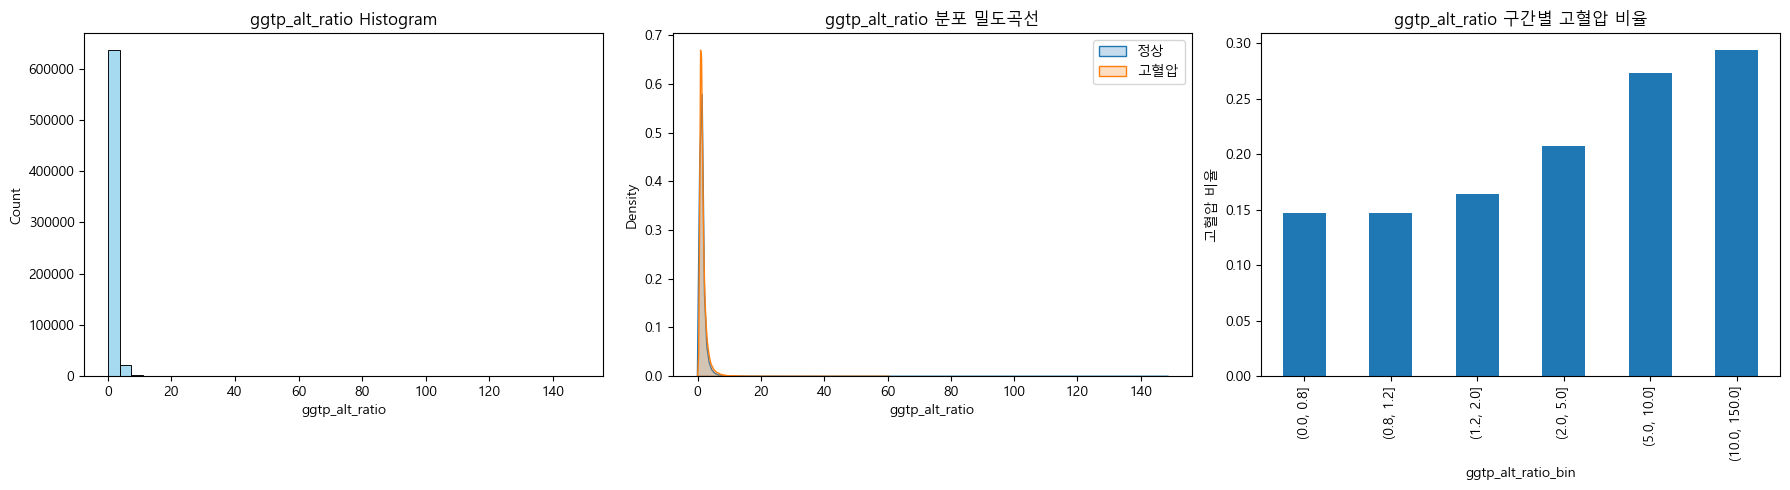

C:\Users\asia\AppData\Local\Temp\ipykernel_8180\1237547272.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_group = df.groupby(bin_label)[target].mean()


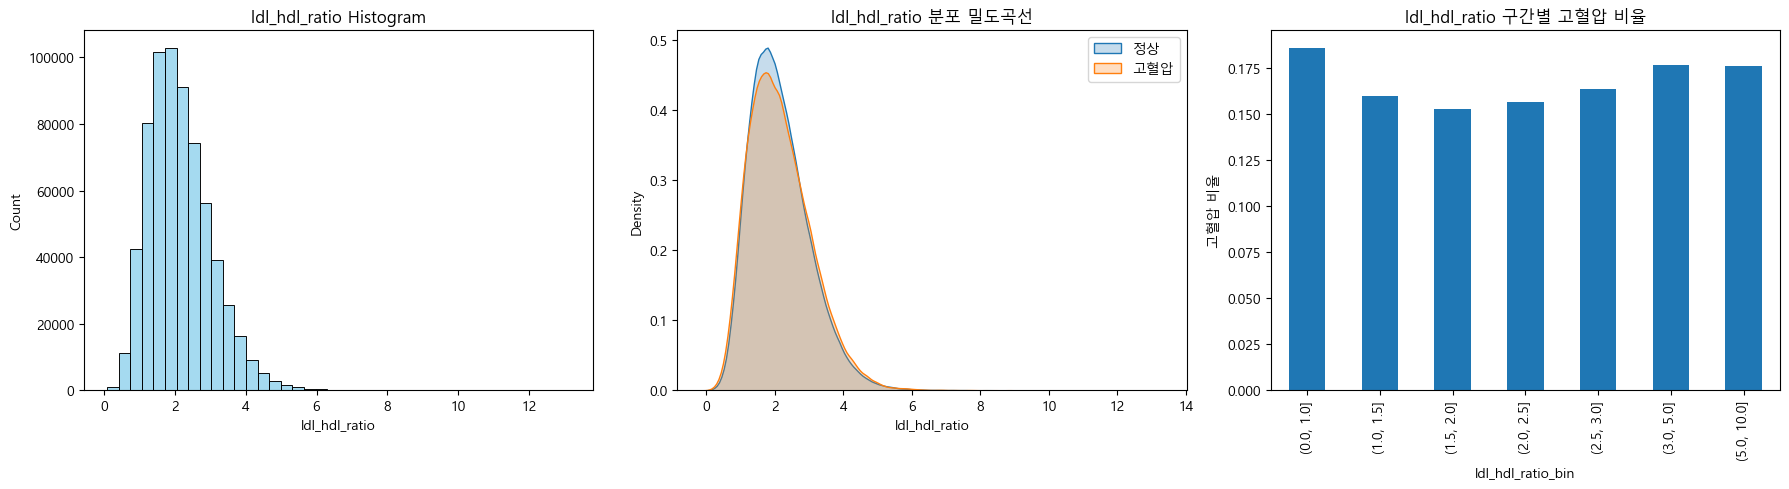

In [29]:
for col in ratio_features:
    plot_ratio_feature_analysis(df.copy(), col, bins=bin_dict[col])

### 1. `tg_hdl_ratio` (중성지방 / HDL 콜레스테롤)

#### 그래프 기반 분석 결과
- **Histogram**: 대부분 0~5 사이에 집중된 분포, 긴 우측 꼬리 존재
- **KDE**: 고혈압군 분포가 정상군보다 오른쪽으로 이동 → 평균적으로 높은 비율
- **Bin별 고혈압 비율**:
  - 0~1 → 약 10%
  - 1~2 → 14%
  - 2~3 → 17%
  - 4~5 → 21%
  - 5~10 → 22% 이상
- **패턴**: 비율이 증가할수록 고혈압 비율이 선형적으로 상승

#### 논리적 근거
- TG/HDL Ratio는 대사증후군, 인슐린 저항성, 심혈관 질환의 지표로 잘 알려져 있음
- 중성지방 증가와 HDL 감소는 고혈압의 간접적 위험 요인
- 문헌 및 임상에서도 TG/HDL 비율이 높을수록 심혈관계 질환 위험이 증가한다고 보고됨

> **모델의 핵심 피처로 사용 가치가 높음**

### 2. `alt_ast_ratio` (ALT / AST)

#### 그래프 기반 분석 결과
- **Histogram**: 대부분 0.7~1.5 범위에 밀집된 안정적 분포
- **KDE**: 고혈압군과 정상군 간의 분포 차이가 약하지만 존재 (고혈압자가 조금 더 높음)
- **Bin별 고혈압 비율**:
  - 0.7 이하 → 약 15%
  - 0.9~1.1 → 약 17%
  - 1.5~3 → 약 19%
- **패턴**: 비율이 증가함에 따라 고혈압 비율이 완만하게 상승

#### 논리적 근거
- ALT/AST 비율은 간 기능 이상 또는 지방간 의심 지표
- 간 기능 저하 또는 지방간은 대사질환과 관련이 있으며, 고혈압과 함께 나타나는 경우가 많음
- 직접적인 고혈압 인자보다는 간접적인 건강 상태 반영

> **단독보다는 보조 지표로서 활용할 수 있음**

### 3. `ggtp_alt_ratio` (GGT / ALT)

#### 그래프 기반 분석 결과
- **Histogram**: 대부분 0~5에 몰려 있으며, 최대 150 이상의 극단값 존재
- **KDE**: 고혈압자의 분포가 더 넓고, 꼬리가 더 길게 퍼짐
- **Bin별 고혈압 비율**:
  - 0.8 이하 → 15%
  - 2~5 → 20%
  - 10~150 → 30% 근접
- **패턴**: 비율이 일정 수준 이상부터 급격히 상승

#### 논리적 근거
- GGT는 간 해독 효소, ALT는 간 손상 관련  
→ 이들의 비율은 간 해독 부담 또는 지방간·음주성 간질환 반영
- GGT/ALT 비율이 높은 경우, 대사증후군·고혈압 등과의 연관성 높음

> **고위험군 식별 가능 → 로그변환 또는 구간화하여 사용 추천**

### 4. `ldl_hdl_ratio` (LDL / HDL)

#### 그래프 기반 분석 결과
- **Histogram**: 정규분포 형태에 가까움 (1~3 사이에 분포 집중)
- **KDE**: 고혈압/정상군 간 분포가 거의 겹침
- **Bin별 고혈압 비율**:
  - 0~1 → 18.5%
  - 1.5~2.5 → 16%
  - 3~5 → 18%
- **패턴**: 비율과 고혈압 간의 관계가 불규칙하고 일관되지 않음

#### 논리적 근거
- LDL/HDL 비율은 심혈관계 위험도 예측에는 유용
- 하지만 고혈압과의 직접적 연관성은 낮고, 예측 모델에서 분리력도 약함
- 데이터에서 고혈압 비율이 특정 구간에서 오히려 감소하는 등 비선형적, 불안정한 경향